# MODELLING AND EVALUATION NOTEBOOK 

### Objectives

* This note book helps meet the clients business requirements 2 as listed below  
  - The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.


### Inputs

* The input for this notebook from the test, train and vaidation datasets created in the DataColelction notebook under the below directories
  - Train Dataset - /workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/input/dataset/cherry-leaves/train
  - Test Dataset - /workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/input/dataset/cherry-leaves/test
  - Validate Dataset - /workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/input/dataset/cherry-leaves/validation
  - image shape embeddings
  

### Outputs

* The output will as below 
  - Images distribution plot in train, validation, and test set 
  - Image augmentation 
  - Class indices to change prediction inference in labels
  - Machine learning model creation and training
  - Save model
  - Learning curve plot for model performance 
  - Model evaluation on pickle file
  - Prediction on the random image file

### Importance of this notebook

  - Image augmentation increases the training image data by artificially and temporarily creating training images through different processes,
or a combination of multiple processes, such as random rotation, shifts, shear, and flips, etc, in the computer’s short term memory.
  



---

### Import Libraries
- There is no plt module within matplotlib
- In the majority of the use cases in Data Science, we use a matplotlib submodule called **pyplot** which is imported under the **alias plt**

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

### Change working directory 

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [15]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [16]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [17]:
current_dir = os.getcwd()
current_dir

'/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves'

### Set input directories

Set the Path for Train , Test and Validation datasets

In [18]:
my_data_dir = '/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/input/dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory

- The output directory will be created as **outputs** and a subdirectory will be cretaed to store different versions of the output.
- We set the initial version to v1.
- Every time the cell is clicked the message **"The current version is V1. If you wish to create a new version change the version varibale to V2 and proceed."** will be displayeed.
- To create a new version, just chaange the version variable to v2

In [19]:
version = 'v1'
file_path = f'/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
  print('The current version is V1. If you wish to create a new version change the version varibale to V2 and proceed.')
  pass
else:
  os.makedirs(name=file_path)

The current version is V1. If you wish to create a new version change the version varibale to V2 and proceed.


### Set label names

Label names for the images will be **healthy** and **powdery_mildew**

In [20]:
# Set the labels
labels = os.listdir(train_path)
print('Label for the images are',labels)

Label for the images are ['healthy', 'powdery_mildew']


### Set image shape

In [21]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

## Number of images in train, test and validation data
  
- in what ratio should we split the data for Train, Test and Validation?
    - As a rule of thumb, with **supervised learning**
      - 20-30% of the data is used for the test set.
      - 10-20% for  validation sets 
      - Balance being set aside for the train set.
    - The Validation and test sets are similar in  that they are both used to evaluate the model performance.
    - However, they differ only in that the  validation set is used in iteratively tuning the  model for improved performance, through comparison  of different algorithms or hyperparameters.
    - Therefore, as it is no longer considered  to be unseen data by the model,  it can’t be used again as part of the test set.  

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




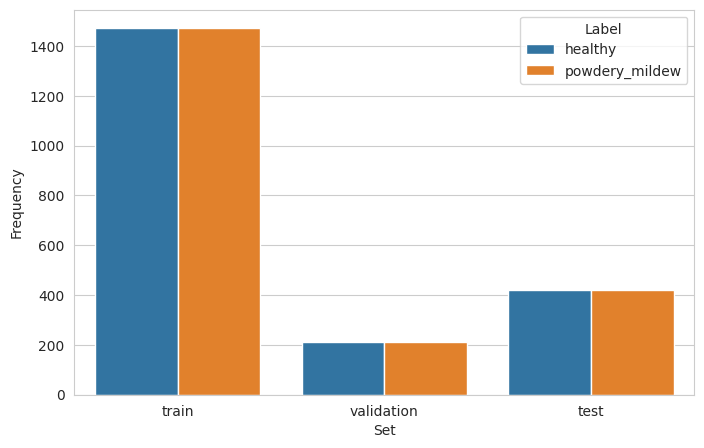

In [22]:
data = []

for folder in ['train', 'validation', 'test']:
    for label in labels:
        # Construct the directory path using os.path.join
        folder_path = os.path.join(my_data_dir, folder, label)
        
        # Calculate the frequency
        freq = len(os.listdir(folder_path))
        
        # Append the data as a dictionary
        data.append({'Set': folder, 'Label': label, 'Frequency': freq})
        
        # Print frequency for each folder and label
        print(f"* {folder} - {label}: {freq} images")

# Convert the list of dictionaries to a DataFrame
df_freq = pd.DataFrame(data)


print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

## Image Data Augmentation.
- Data Augmnentation is a Critical step of the Machine Learning Pipeline after Data Colelction and Data Cleaning. 
- From the output of the previous cell we see that the number of images for the train, test and validation sets might not be sufficient  when it comes to Deep Learning Models.
- One of the limitations of Deep learning modelsis the requiremetn for a large amoun of data for effective functioning. As we have limited data available to us in the form of images , we use Image Augmentation Technique to increase the amount of randomized image data.  
- Augmentation  is a series of data analysis techniques  to increase the quantity of data by adding  slightly modified copies of the existing data
- You can augment the data set by taking an original  image and creating new copies that are
  -  defocused,
  -  flipped, 
  -  rotated,
  -  cropped,
  -  noisy,
  -  stretched or 
  -  the colour modified in some way.
-  These synthetic  images can reduce the risk of **overfitting**  by providing a larger dataset to work with.
-  More data enables better algorithm performance 


**TensorFlow and Keras**
- TensorFlow is a Python library, released in late 2015, for fast numerical computing and is heavily used for deep learning.
- We can build and train deep learning models relatively easily using TensorFlow's high-level interface.
- We use Python to provide a high-level programming front end that interacts with TensorFlow, but the actual math operations are computed in C++.
- Due to its effectiveness and syntax simplicity, another neural network library, known as Keras, was adopted as the interface for TensorFlow from version 2.0.

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Intialize ImageDataGenerator
-   The ImageDataGenerator function from the TensorFlow package will help us to perform the task of image data augmentation.
-   This function generates batches of image data with real-time data augmentation.
-   In this project, we are artificially creating more **training images** with a combination of multiple processes like 
    -   **rotation_range** -: a random rotation of 20 degrees, 
    -   **width_shift_change** -:shifting the width of images by 0.10 ratio of the image, 
    -   **height_shift_range** -:shifting the height of the images by 0.10 ratio of the images,
    -   **shear** -: shearing the image by 0.1, 
    -   **zoom_range** -: zooming the image by 10 percent, 
    -   **horizontal_flip**  &  **vertical_flip**-:flipping the image horizontally and vertically, 
    -   **fill_mode** -:filling the broken pixels of the images with the nearest pixel value and 
    -   **rescale** -:standardizing the image pixels between 0 to 255 pixels.
- We assign this to the variable ** augmented_image_data**  

In [24]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

Augment training image dataset

In [25]:
batch_size = 20 # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment validation image dataset
- Our image augmentation on our Test and validation datasets is not similar to the training dataset. 
- The reason : - 
  - We first need to build our data set with large numbers of images of different scenarios so that we can train our model. 
  - We  then use the Test and Validation datasets to simply test if our model is working

In [26]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment test image dataset

- Our image augmentation on our Test and validation datasets is not similar to the training dataset. 
- The reason : - 
  - We first need to build our data set with large numbers of images of different scenarios so that we can train our model. 
  - We  then use the Test and Validation datasets to simply test if our model is working

In [27]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Plot augmented training image
- We are using **plt.imshow()** to display the NumPy array as an image

In [28]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

AttributeError: 'DirectoryIterator' object has no attribute 'next'

Plot augmented validation and test images
- We are using **plt.imshow()** to display the NumPy array as an image

In [9]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

NameError: name 'validation_set' is not defined

In [10]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

NameError: name 'test_set' is not defined

Save class_indices

In [25]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/v1/class_indices.pkl']

# Model creation

- This section of the notebook helps us meet Requirement 2 of the Client.
  - The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew. 
- This will also help us populate the **Page 3: Healthy or Powdery Detector** of our Streamlit Dashboard App.
- When need to Predict a Category , we use the ML task of Classification.
  - In our project, we need to classify images, which is unstructured , so we use Convolutional Neural Network.
  - Convolutional Neural Network which is more modern and computational heavy,an update to the artificial neural networks.
  - The convolutional neural network consists of convolutional layers before the deep neural layers.
  - Deep learning just refers to many layers of nodes inside a Convolutional Neural Network (CNN).     
- The image augmentation process makes our model ready for the real-time implementation of the systems.
- It also increases our model performance while training, via increasing the number of different combinations of pattern images in the memory of the computer.
- We will use the python library TesnorFlow to build and train our own deep learning model for this project.
- In our project, our CNN model will learn from the **dominant feature** of the pre-labeled cell images of our cherry leaves data.
  - In our project, the dominant feature is the **Mildew** in the cherry leaf image.
- The human behavior of **“learning from our mistakes”** inspires the optimizer and loss function mechanisms in deep neural networks.
  - Scientists have used this principle and mathematically created an algorithm to reduce error by using **optimizers and loss functions**. 

## ML model

Import model packages
-   How do you use TensorFlow to create a neural network model?
    -   You use a function in TensorFlow named sequential model.
    -   Tensorflow uses the Sequential Model function to model Neural Networks using different layers arranged to create a network.
    -   Layer examples include Dense layers, convolution layers, Long Short-Term Memory(LSTM), Bi-directional LSTM, dropout layers, batch normalisation layers, and others.
    -   The most commonly used layers are Dense layers, Convolutional Layers, LSTMs for creating Deep neural networks, convolution neural networks and NLP models.
- Due to its effectiveness and syntax simplicity, another neural network library, known as Keras, was adopted as the interface for TensorFlow from version 2.0.
- Tensorflow uses the Sequential model function to model Neural Networks using a different set of layers that are arranged, creating a network.
- To import a given layer, simply type from tensorflow.keras.layers import  ... and choose your layer.
- First, we import the Sequential API from tensorflow.keras.models package and Activation, Dropout, Flatten,Dense, Conv2D, MaxPooling2D APIs from tensorflow.keras.layers packages.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

MODEL
- A Dense layer is a fully-connected neural network layer
- A Dropout layer is a regularization layer and is used to reduce the chance of overfitting the neural network.
- What does each layer do, and why is it important?
  - Convolution layers are used to select the dominant pixel value from the non-dominant pixels in images using filters. It allows you to find patterns (or features) in the image
  - Pooling layers reduce the image size by extracting only the dominant pixels (or features) from the image. The combination of these two layers removes the nonessential part of the image and reduces complexity
  - The Flatten layer is used to flatten the matrix into a vector, which means a single list of all values. That is fed into a dense layer.

In [ ]:
def create_tf_model():
    model = Sequential()# the model used is Sequential 

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

Model Summary

In [34]:
create_tf_model().summary()

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-13 09:13:46.196255: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29491200 exceeds 10% of free system memory.
2025-04-13 09:13:46.235254: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29491200 exceeds 10% of free system memory.
2025-04-13 09:13:46.244867: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29491200 exceeds 10% of free system memory.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,429,377 (28.34 MB)

 Trainable params: 7,429,377 (28.34 MB)

 Non-trainable params: 0 (0.00 B)

Early Stopping

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

Fit model for model training

In [55]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.7080 - loss: 0.5992 - val_accuracy: 0.9690 - val_loss: 0.0942
Epoch 2/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 2:49 1s/step - accuracy: 0.8500 - loss: 0.3522

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.8500 - loss: 0.3522 - val_accuracy: 0.9929 - val_loss: 0.0292
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.9717 - loss: 0.1059 - val_accuracy: 0.9976 - val_loss: 0.0184
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 1.0000 - loss: 0.0202 - val_accuracy: 0.9976 - val_loss: 0.0090
Epoch 5/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9765 - loss: 0.0640 - val_accuracy: 0.8905 - val_loss: 0.2526
Epoch 6/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9500 - loss: 0.1341 - val_accuracy: 0.8929 - val_loss: 0.2473
Epoch 7/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.9831 - loss: 0.0686 - val_accuracy: 0.9929 - val_loss: 0.0510


Save model

In [56]:
model.save('/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/v1/mildew_detection_model.h5')

# Model Performance
- We plot and evaluate the Model performance and save the reports in the output folder.
- These will be used in the Model performance metrics section of the Streamlit Dashboard App.
- With machine learning models we want to analyze the performance of the model over a test set of data that the ML model has not seen at the
time of training. 
  -   This performance analysis is called the generalization of the model.
- If we get the desired generalized performance, we take these models further for the deployment,otherwise we go for the optimization process

### Model learning curve
-   We look at our learning curve plot in the below cells. 
-   The learning curve shows the **loss and accuracy** achieved by the model over the **training and validation** data per epoch. 
-   It shows how the model behaves with the validation data, while training.
-   In ML, the behavior of the model is explained in three ways:
    -   overfitting, 
    -   underfitting, 
    -   and normal learning. 
-   In our plot, the model behaviour is **overfitting**.
    -   We can explain this because both loss and accuracy plots for training and validation data overshooting per epoch, and the validation accuracy does not progress with it.
    -   As a result, we would see a gap between the training and validation accuracy lines.
-   Generally, overfitting is a more common phenomenon in neural networks. We can reduce it by tuning our model hyperparameters.

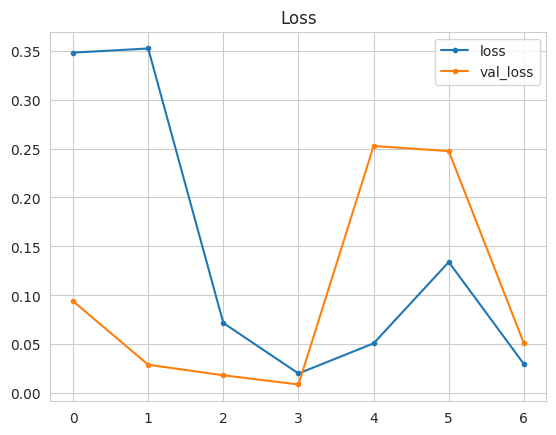

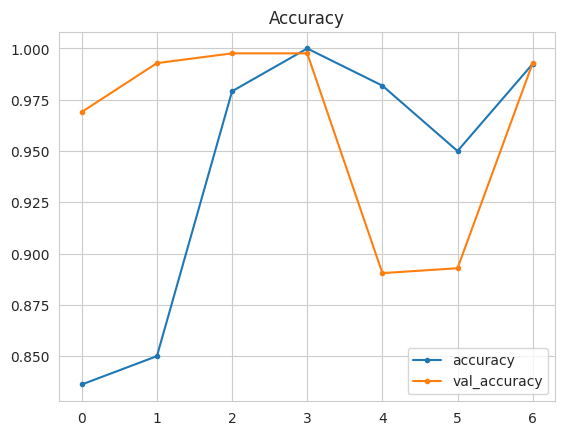

In [57]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

### Model Evaluation

- In a deep learning model, we  use the evaluation function from Tensorflow to check generalized loss and accuracy over the test set of the data.

Load saved model
- Before evaluating the model, let’s load the saved ML model using the **load_model function** from  TensorFlow.
- The model we saved is **mildew_detection_model.h5**

In [58]:
from keras.models import load_model
model = load_model('/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/v1/mildew_detection_model.h5')

Evaluate model on test set



In [59]:
evaluation = model.evaluate(test_set)

43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 347ms/step - accuracy: 0.9960 - loss: 0.0293


Save evaluation pickle

In [60]:
joblib.dump(value=evaluation ,
            filename=f"/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/v1/evaluation.pkl")

['/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/v1/evaluation.pkl']

Predict on new data

In [ ]:
from tensorflow.keras.preprocessing import image

pointer = 66 
label = labels[0] # select healthy or powdery mildew cherry leaves

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

2025-04-13 16:20:37.328593: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'labels' is not defined

Convert image to array and prepare for prediction

In [62]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities

In [63]:
pred_proba = model.predict(my_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class =  target_map[pred_proba > 0.5]  

if pred_class == target_map[0]: pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1.0
healthy


* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

-   We put the training and test data in the .gitignore
-   We are still sending validation images because we need pre-labeled images to create an image montage on the dashboard and our data is not sensitive data.

In [ ]:
! cat ..gitignore


cat: .gitignore: No such file or directory


In [64]:
import os
try:
    # create here your folder
    os.makedirs(name='/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/')
except Exception as e:
    print(e)


[Errno 17] File exists: '/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/'
